In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
import seaborn as sns
sns.set_theme(palette='Set2')
warnings.filterwarnings("ignore")


*1. Работа с таблицей*

*1.1 Чтение таблицы:*

In [2]:
data = pd.read_csv('hgnc_complete_set/hgnc_complete_set.tsv', sep='\t')

In [3]:
data

,hgnc_id,symbol,name,locus_group,locus_type,status,location,location_sortable,alias_symbol,alias_name,...,merops,imgt,iuphar,kznf_gene_catalog,mamit-trnadb,cd,lncrnadb,enzyme_id,intermediate_filament_db,rna_central_ids
0,HGNC:5,A1BG,alpha-1-B glycoprotein,protein-coding gene,gene with protein product,Approved,19q13.43,19q13.43,NaN,NaN,...,I43.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,non-coding RNA,"RNA, long non-coding",Approved,19q13.43,19q13.43,FLJ23569,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URS00007E4F6E
2,HGNC:24086,A1CF,APOBEC1 complementation factor,protein-coding gene,gene with protein product,Approved,10q11.23,10q11.23,ACF|ASP|ACF64|ACF65|APOBEC1CF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HGNC:7,A2M,alpha-2-macroglobulin,protein-coding gene,gene with protein product,Approved,12p13.31,12p13.31,FWP007|S863-7|CPAMD5,NaN,...,I39.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HGNC:27057,A2M-AS1,A2M antisense RNA 1 (head to head),non-coding RNA,"RNA, long non-coding",Approved,12p13.31,12p13.31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,URS00001F234A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42257,HGNC:25820,ZYG11B,"zyg-11 family member B, cell cycle regulator",protein-coding gene,gene with protein product,Approved,1p32.3,01p32.3,FLJ13456,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42258,HGNC:13200,ZYX,zyxin,protein-coding gene,gene with protein product,Approved,7q34,07q34,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42259,HGNC:51695,ZYXP1,zyxin pseudogene 1,pseudogene,pseudogene,Approved,8q24.23,08q24.23,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42260,HGNC:29027,ZZEF1,zinc finger ZZ-type and EF-hand domain contain...,protein-coding gene,gene with protein product,Approved,17p13.2,17p13.2,KIAA0399|ZZZ4|FLJ10821,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*1.2 Работа с данными таблицы*

In [4]:
data.isna().sum() #видим, что много пропусков

hgnc_id                         0
symbol                          0
name                            0
locus_group                     0
locus_type                      0
status                          0
location                     1164
location_sortable            1164
alias_symbol                21452
alias_name                  36121
prev_symbol                 30879
prev_name                   21533
gene_family                 23319
gene_family_id              23319
date_approved_reserved       1161
date_symbol_changed         33322
date_name_changed           20066
date_modified                   8
entrez_id                    1296
ensembl_gene_id              5526
vega_id                     10774
ucsc_id                     17874
ena                         21844
refseq_accession             3429
ccds_id                     23390
uniprot_ids                 22269
pubmed_id                   20466
mgd_id                      24513
rgd_id                      24441
lsdb          

Построим гистограмму распределения генов по группам в зависимости от одного из признаков. Посмотрим сколько групп вообще есть.

In [5]:
data.describe()

,entrez_id,homeodb,orphanet,kznf_gene_catalog,mamit-trnadb
count,4.096600e+04,317.000000,4449.000000,621.000000,22.000000
mean,3.466060e+07,8545.908517,268624.981794,485.702093,17.500000
std,4.845467e+07,188.113724,140839.724870,329.883508,6.493587
min,1.000000e+00,8353.000000,117602.000000,2.000000,7.000000
25%,2.684025e+04,8433.000000,122598.000000,224.000000,12.250000
50%,2.836405e+05,8512.000000,240651.000000,426.000000,17.500000
75%,1.003023e+08,8591.000000,420409.000000,654.000000,22.750000
max,1.105996e+08,9530.000000,478263.000000,1243.000000,28.000000


Посторим график количества Nan.

<BarContainer object of 49 artists>

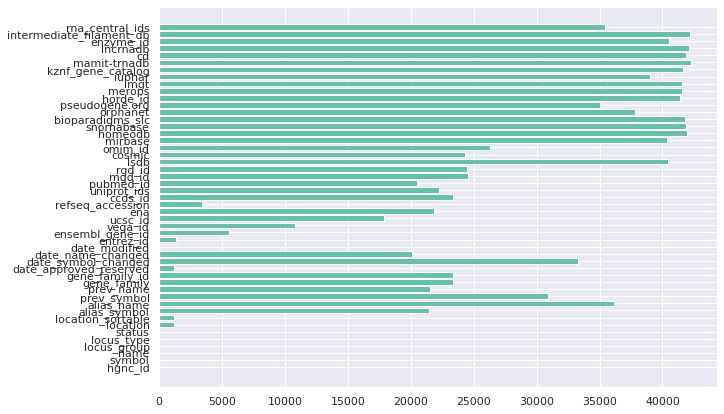

In [6]:
data_1 = data.isna().sum() 

plt.figure(figsize=(10,7))

plt.barh(data_1.index, data_1.values)

Построим гистограмму для столбца group_locus.

(array([19098.,     0.,  7145.,     0., 13076.,     0.,  1161.,     0.,
         1204.,   578.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

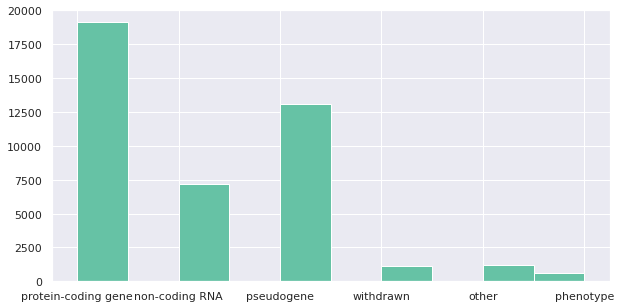

In [7]:
plt.figure(figsize = (10, 5))

plt.hist(data['locus_group'])

3. Картинка:

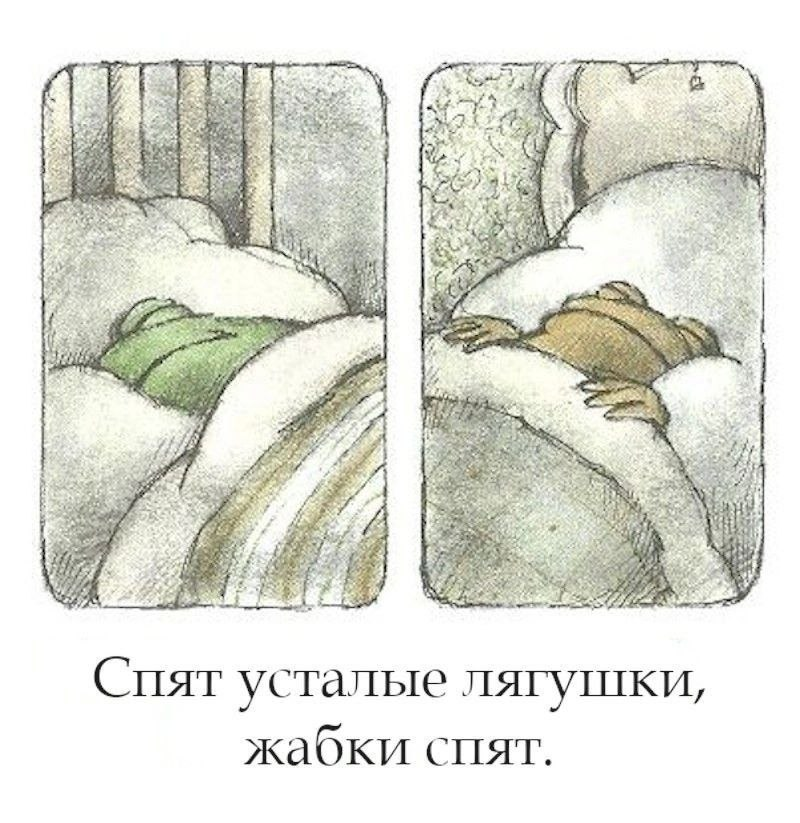

3.* Передать прочитанный в пункте 2 датафрейм в R внутри того же ноутбука (используйте rpy2). Построить любой график по этому датафрейму используя ggplot2 в этом же ноутбуке. Подсказка — задачка на умение гуглить и осваивать новые тулы. Пожалуйста не используйте чат гпт для этого пункта, разобраться с ggplot2 это прикольно и полезно.

In [8]:
pip install rpy2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
%load_ext rpy2.ipython

In [10]:
%%R
install.packages("ggplot2")

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Paris 1) [h

Selection:  6


* installing *source* package ‘ggplot2’ ...
** package ‘ggplot2’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggplot2)


Installing package into ‘/home/aalexandrova/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)
trying URL 'https://ftp.belnet.be/mirror/CRAN/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/octet-stream' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/scratch/RtmplqrHUx/downloaded_packages’


In [11]:
%%R
r = getOption("repos")
r["CRAN"] = "http://cran.us.r-project.org"
options(repos = r)
install.packages("ggplot2")

* installing *source* package ‘ggplot2’ ...
** package ‘ggplot2’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggplot2)


Installing package into ‘/home/aalexandrova/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/x-gzip' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/scratch/RtmplqrHUx/downloaded_packages’


In [12]:
%%R
library(ggplot2)

Передадим Пандасовский DataFrame (data) в R с помощью rpy2:

In [13]:
%R -i data 

Построим график с помощью библиотеки ggplot2 для того же столбца.

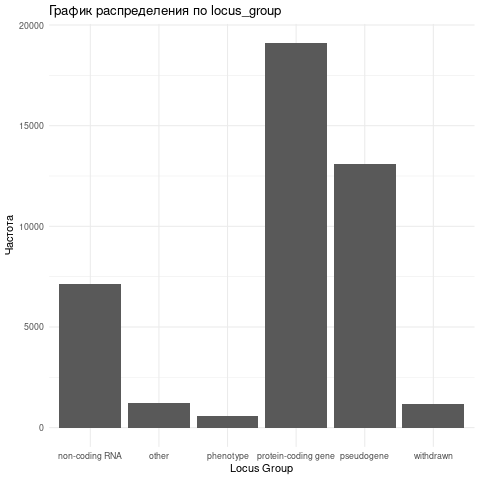

In [14]:
%%R
ggplot(data, aes(x = locus_group)) + 
  geom_bar() +
  labs(title = "График распределения по locus_group",
       x = "Locus Group",
       y = "Частота") +
  theme_minimal()